In [226]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime as dt
from datetime import date
plt.style.use('fivethirtyeight')
end=date.today()
start=date.today()-datetime.timedelta(1200)


In [227]:
df= web.DataReader('SOFI', data_source='yahoo', start=start, end=end)
df2= web.DataReader('Open', data_source='yahoo', start=start, end=end)
df3= web.DataReader('FUBO', data_source='yahoo', start=start, end=end)
df4= web.DataReader('GME', data_source='yahoo', start=start, end=end)
df5= web.DataReader('AMC', data_source='yahoo', start=start, end=end)
df6= web.DataReader('DIS', data_source='yahoo', start=start, end=end)
df7= web.DataReader('F', data_source='yahoo', start=start, end=end)
df8= web.DataReader('ADA-USD', data_source='yahoo', start=start, end=end)
df9= web.DataReader('DOT-USD', data_source='yahoo', start=start, end=end)
df10= web.DataReader('SOL-USD', data_source='yahoo', start=start, end=end)

In [244]:
#Get the number of rows and columns of the DF
df.shape
df
type(df)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Price(USD)')

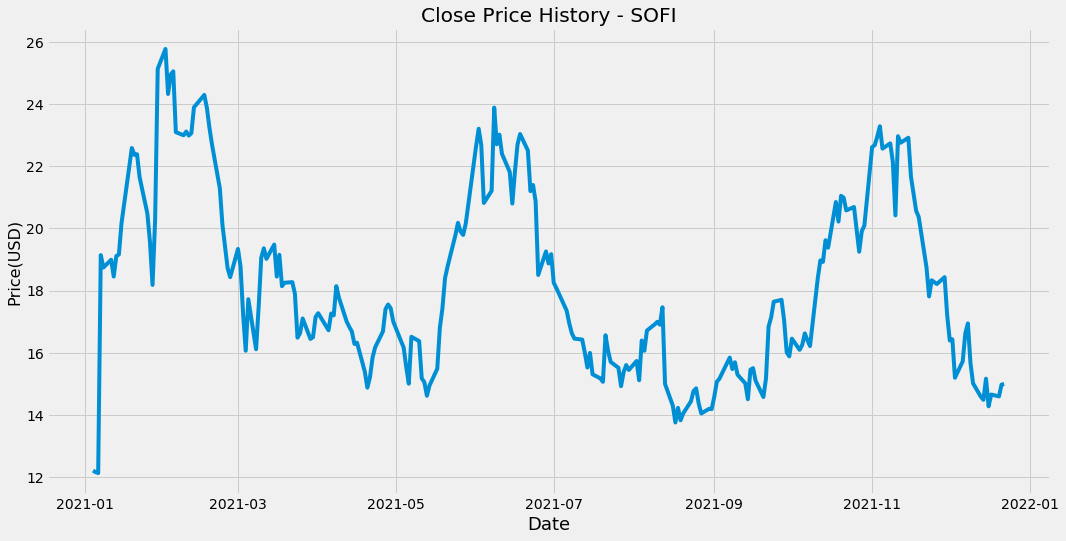

In [169]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History - SOFI')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

Text(0, 0.5, 'Price(USD)')

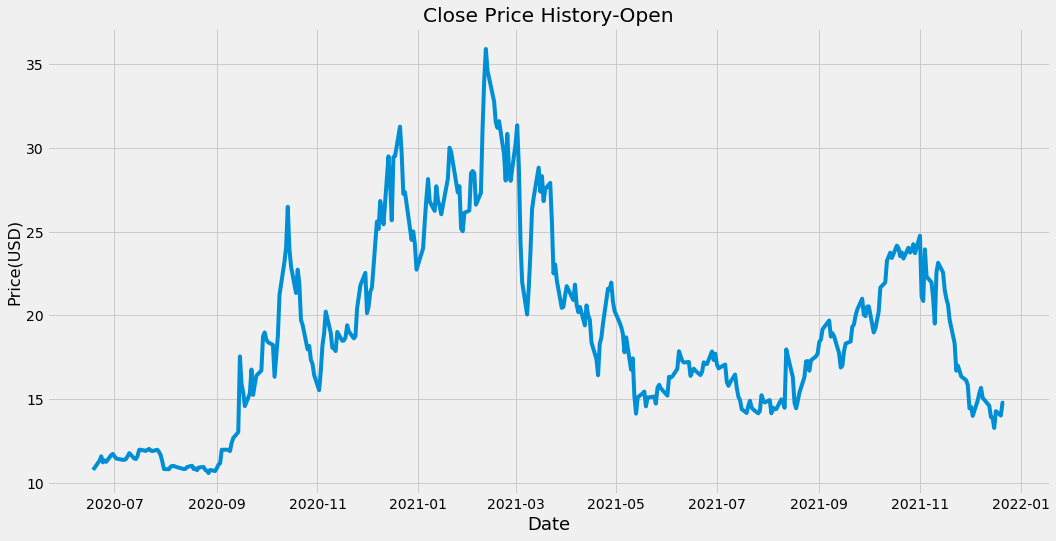

In [170]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History-Open')
plt.plot(df2['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

Text(0, 0.5, 'Price(USD)')

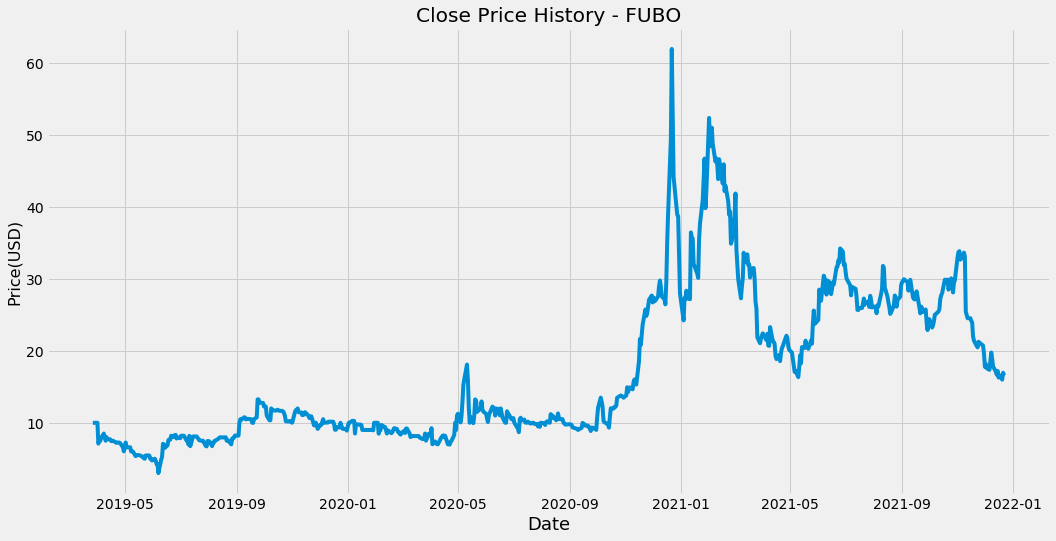

In [171]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - FUBO')
plt.plot(df3['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

Text(0, 0.5, 'Price(USD)')

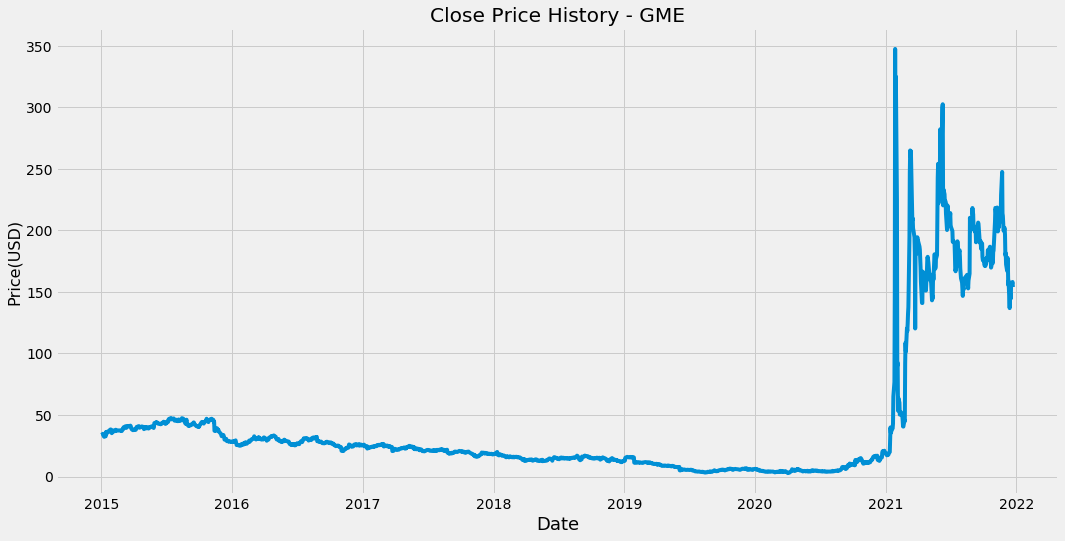

In [172]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - GME')
plt.plot(df4['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

Text(0, 0.5, 'Price(USD)')

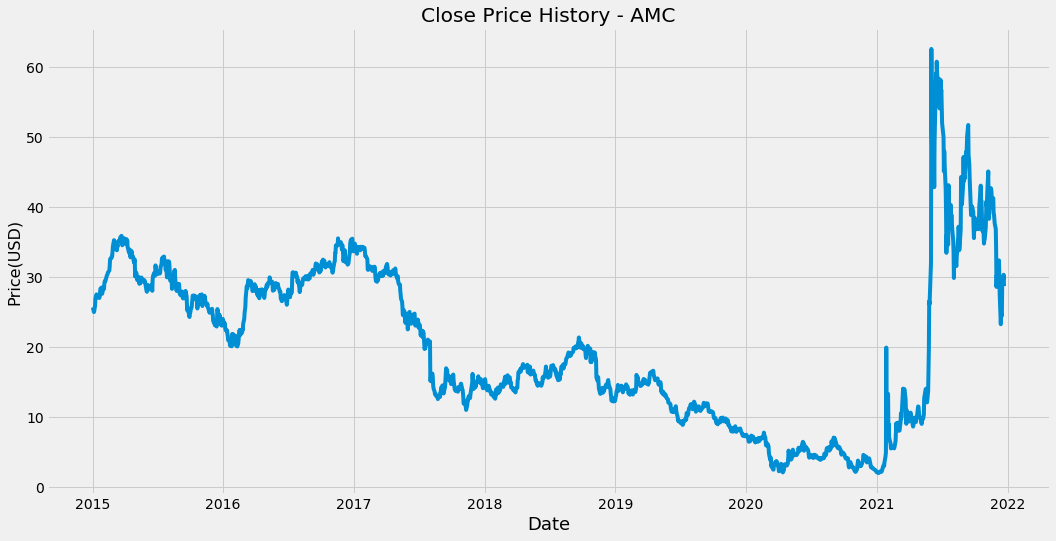

In [173]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - AMC')
plt.plot(df5['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

Text(0, 0.5, 'Price(USD)')

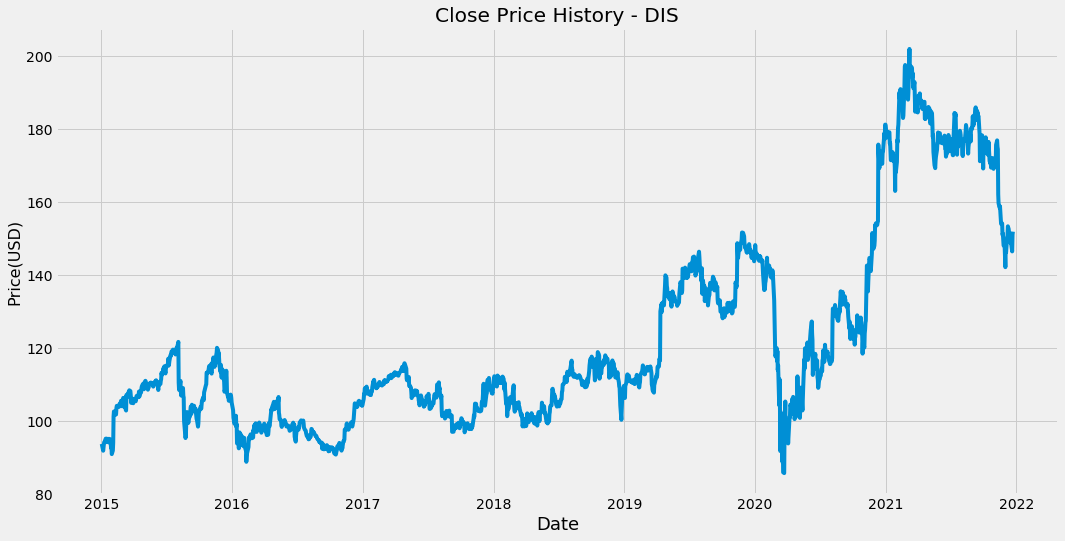

In [174]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - DIS')
plt.plot(df6['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

Text(0, 0.5, 'Price(USD)')

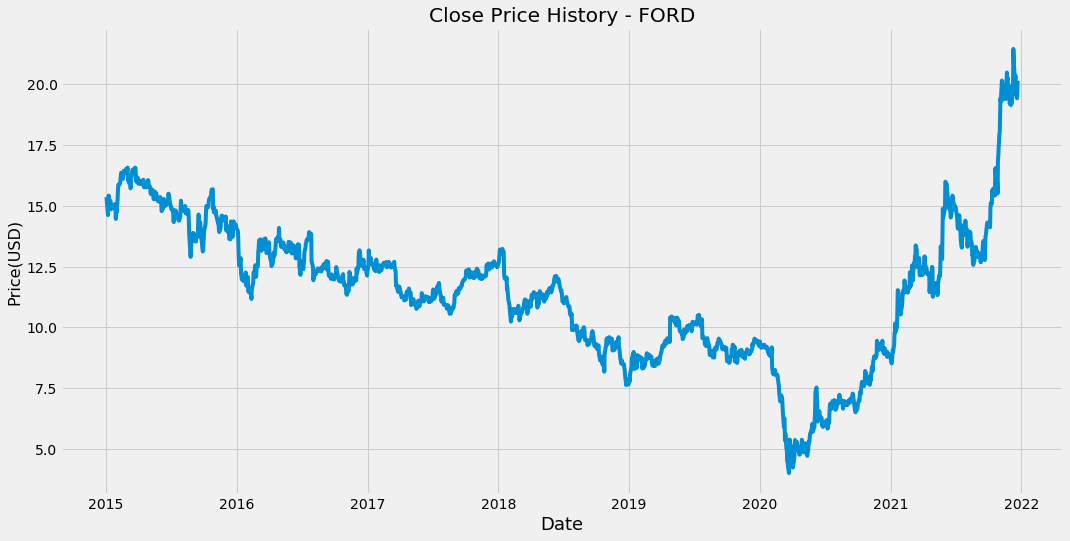

In [175]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History - FORD')
plt.plot(df7['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

Text(0, 0.5, 'Price(USD)')

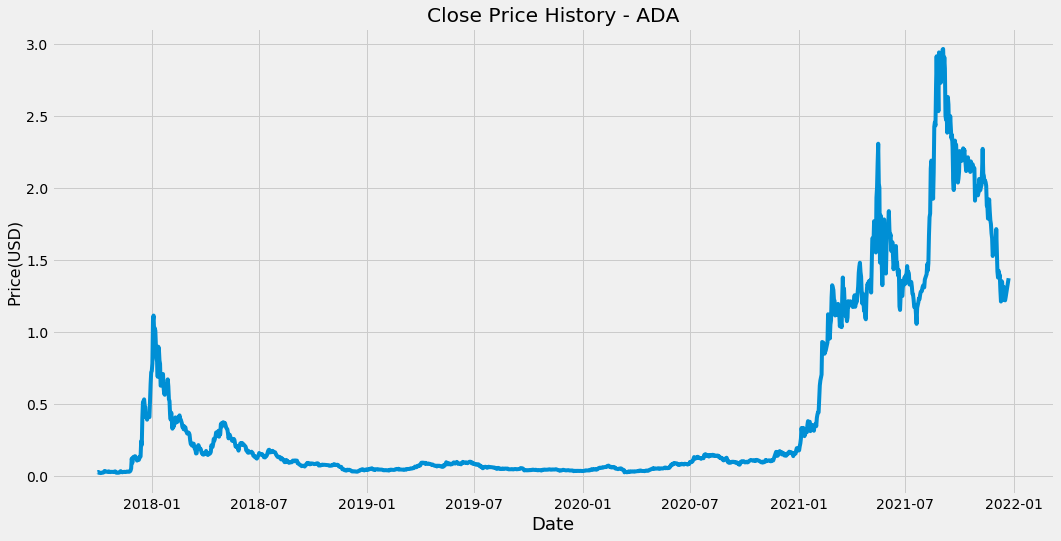

In [176]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History - ADA')
plt.plot(df8['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

Text(0, 0.5, 'Price(USD)')

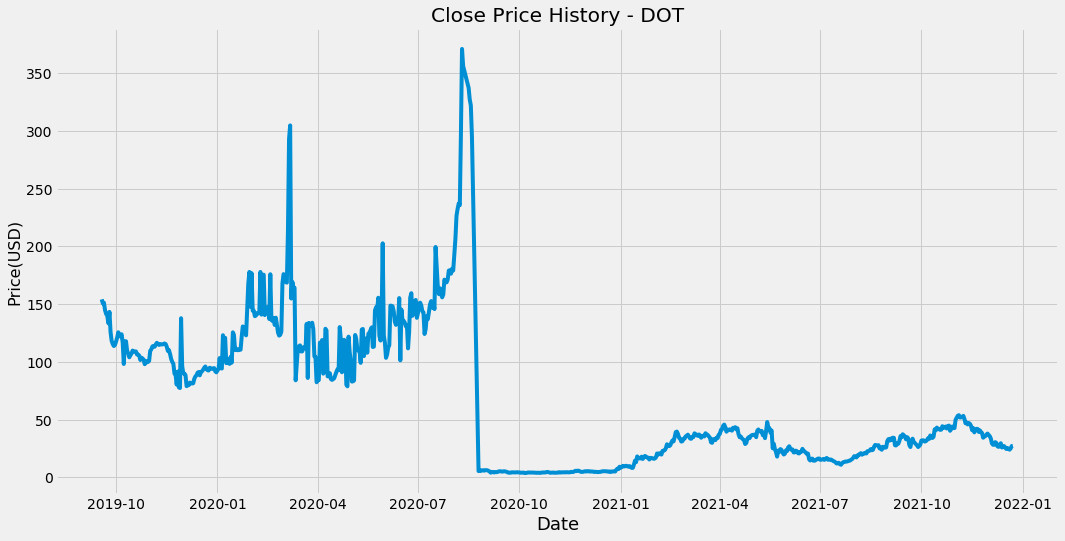

In [177]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - DOT')
plt.plot(df9['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

Text(0, 0.5, 'Price(USD)')

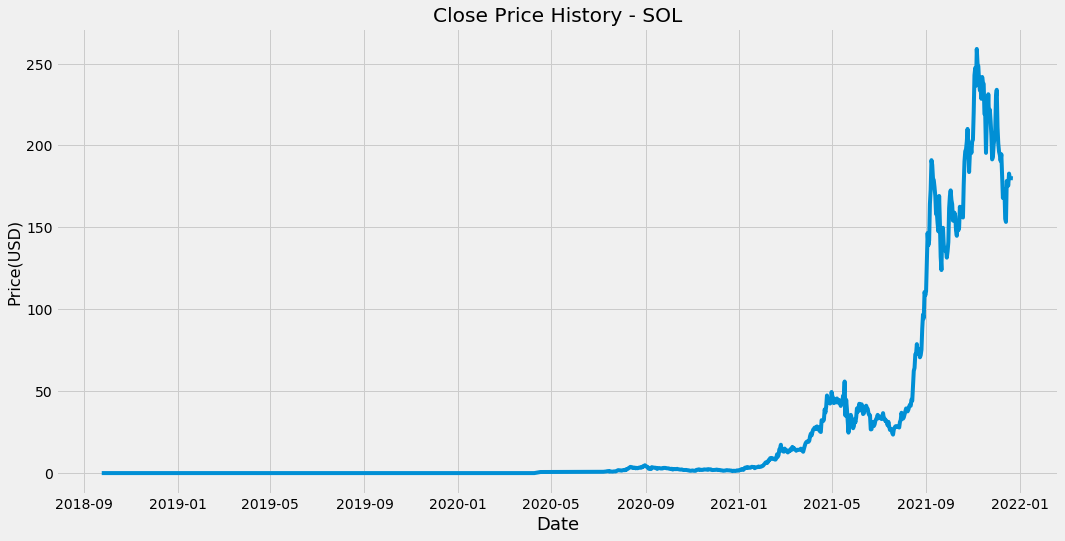

In [178]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - SOL')
plt.plot(df10['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

KeyError: 'Date'